# **Xử lý dữ liệu danh mục**

Khi xử lý dữ liệu bằng các phương pháp liên quan tới số học như linear regression, chúng ta rất hay gặp phải dữ liệu danh mục (ví dụ ngày-tháng-năm, vị trí,...).

Khi đó, ta thường giải quyết theo 2 hướng:
 
- Một là, Không cần chuyển đổi kiểu danh mục thành kiểu số
- Hai là, sẽ cần chuyển đổi kiểu danh mục thành kiểu số

Tuy nhiên, dù giải quyết theo hướng nào, các ngôn ngữ lập trình có thể xử lý cả hai kiểu trên bằng cách chuyển đổi chúng thành một loạt các số nhị phân (tất nhiên là trong một vài trường hợp nhất định thôi). 

Do đó, việc chọn một hướng giải quyết sẽ tùy vào ngữ cảnh bài toán. Vậy thì:

**Khi nào cần chuyển đổi kiểu danh mục thành kiểu số ?**

1. Khi Linear regression hoặc các thuật toán học máy khác yêu cầu các biến độc lặp (x) và (y) phải là số. 

Ví dụ: 

- Dự đoán giá nhà với các biến:

    + Diện tích: Số mét vuông
    + Số phòng ngủ: Số phòng ngủ
    + Số phòng tắm: Số phòng tắm
    + Loại nhà: Nhà ở gia đình đơn lẻ, nhà chung cư, nhà phố
    + Vị trí: Trung tâm thành phố, ngoại ô, vùng nông thôn
    + Giá: Giá bán của ngôi nhà

Dễ thấy rằng, các biến "Loại nhà" và "Vị trí" là biến danh mục, nhưng đơn vị thì lại rất mơ hồ và khó hiểu đối với Linear regression. Do đó, trường hợp này rất cần việc chuyển đổi từ kiểu danh mục thành kiểu số.


2. Khi bạn muốn nhóm dữ liệu và phân tích thống kê. Việc dùng số để định danh cho danh mục sẽ tiện lợi hơn rất nhiều

Ví dụ:

- Phân loại khách hàng với các biến:

    + ID khách hàng: Số ID duy nhất cho mỗi khách hàng
    + Tên: Tên của khách hàng
    + Email: Địa chỉ email của khách hàng
    + Quốc gia: Quốc gia cư trú của khách hàng
    + Sản phẩm đã mua: Tên của sản phẩm mà khách hàng đã mua

Bạn muốn nhóm khách hàng lại với nhau dựa trên quốc gia của họ. Để thực hiện việc này, bạn cần chuyển đổi biến Quốc gia thành dạng số.

| Quốc gia  | Mã số |
|---------- |-------|
| Việt Nam  |   1   |
| Thái Lan  |   2   |
| Malaysia  |   3   |
| Singapore |   4   |
| Indonesia |   5   |

**Khi nào không cần chuyển đổi kiểu danh mục thành kiểu số ?**

⟹ Khi các thuật toán không yêu cầu các biến số, chẳng hạn như cây quyết định hoặc rừng ngẫu nhiên

⟹ Khi bạn cần các biến danh mục để mô tả dữ liệu hoặc làm báo cáo.

Ví dụ:

| Quốc gia | Số lượng khách hàng |
|---|---|
| Việt Nam | 100 |
| Thái Lan | 50 |
| Malaysia | 25 |
| Singapore | 15 |
| Indonesia | 10 |

**Lưu ý:** linear regression rất cần chuyển đổi

**Quy tắc chung:** Nếu bạn không chắc chắn liệu mình có cần chuyển đổi một biến danh mục thành dạng số hay không, thì tốt nhất là nên chuyển đổi. 

**Các phương pháp chuyển đổi ngày tháng năm thành dạng số**

* **Số thứ tự của ngày trong năm:** Phương pháp này đơn giản và dễ thực hiện, nhưng nó không tính đến tính chu kỳ của dữ liệu theo thời gian.
* **Mã hóa một nóng (one-hot encoding):** Phương pháp này tạo một biến nhị phân cho mỗi ngày hoặc tháng trong năm. Điều này cho phép mô hình hồi quy tuyến tính nắm bắt được các hiệu ứng theo mùa hoặc các xu hướng khác liên quan đến thời gian.
* **Biến giả (dummy variable):** Phương pháp này tương tự như mã hóa một nóng, nhưng chỉ tạo các biến nhị phân cho các khoảng thời gian cụ thể. Ví dụ, bạn có thể tạo các biến giả để chỉ ra các quý hoặc các tháng cụ thể trong năm.

**Ví dụ**

Sử dụng **Số thứ tự của ngày trong năm:**

Giả sử chúng ta có một tập dữ liệu thống kê những người mắc tiểu đường (diabete dataset) với biến 4 ngẫu nhiên gồm:

* (1) Date in MM-DD-YYYY format
* (2) Time in XX:YY format
* (3) Code
* (4) Value

Trong bộ dữ liệu diabete dataset, biến Value thường đại diện cho mức độ đường huyết (glucose level) của bệnh nhân.

Mức đường huyết bình thường dao động trong khoảng 70-100 mg/dL lúc đói và dưới 140 mg/dL sau khi ăn. Người bị đái tháo đường thường có mức đường huyết cao hơn mức này do cơ thể không sản xuất hoặc không sử dụng insulin hiệu quả để kiểm soát lượng đường trong máu.

Chúng ta muốn sử dụng hồi quy tuyến tính để dự đoán Value dựa trên  Date, Time và Code.

**1. Chuyển đổi biến ngày thành dạng số**

```python
    import pandas as pd
    from sklearn.linear_model import LinearRegression

    # Đọc dữ liệu từ tệp CSV
    data = pd.read_csv('data-01', sep='\t', header=None, names=['Date', 'Time', 'Code', 'Value'])

    # Chuyển đổi Date sang số ngày
    data['Date'] = data['Date'].apply(lambda x: (datetime.strptime(x, '%m-%d-%Y') - datetime(1900, 1, 1)).days)

    # Chuyển đổi Time sang số giờ
    data['Time'] = data['Time'].apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1]) / 60)

```

Chúng ta có thể chuyển đổi biến ngày thành dạng số bằng cách sử dụng số thứ tự của ngày trong năm. Ví dụ, ngày "04-21-1991" sẽ được chuyển đổi thành số 111 (ngày thứ 111 trong năm 1991).

**2. Xây dựng mô hình hồi quy tuyến tính**

```python

    # Tạo biến độc lập
    X = data[['Date', 'Time', 'Code']]
    y = data['Value']

    # Khởi tạo mô hình hồi quy tuyến tính
    model = LinearRegression()

    # Huấn luyện mô hình
    model.fit(X, y)

    # Dự đoán doanh số bán hàng
    y_pred = model.predict(X)
```

**3. Đánh giá mô hình**

Chúng ta có thể đánh giá mô hình bằng cách sử dụng các chỉ số như lỗi trung bình tuyệt đối (MAE) hoặc lỗi căn bậc hai trung bình (RMSE).

```python
    from sklearn.metrics import mean_absolute_error, mean_squared_error

    # Tính MAE và RMSE
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    print('MAE:', mae)
    print('RMSE:', rmse)

    # Dự đoán giá trị mới
    new_data = [[100, 10.5, 48]]
    prediction = model.predict(new_data)
    print(f"Dự đoán giá trị cho ngày thứ 100, lúc 10:30 và Code 48: {prediction[0]}")
```
**4. Vẽ đồ thị biểu diễn**
```python
   import matplotlib.pyplot as plt

    # Vẽ đồ thị phân phối của biến Value
    plt.figure(figsize=(8, 6))
    plt.hist(y, bins=30, edgecolor='black')
    plt.title('Phân phối của biến Value')
    plt.xlabel('Giá trị')
    plt.ylabel('Số lượng')
    plt.show()
    
    # Vẽ đồ thị so sánh giá trị thực tế và dự đoán
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(y)), y, color='blue', label='Giá trị thực tế', s=10)
    plt.scatter(range(len(y)), model.predict(X), color='red', label='Giá trị dự đoán', s=10)
    plt.title('So sánh giá trị thực tế và dự đoán')
    plt.xlabel('Mẫu dữ liệu')
    plt.ylabel('Giá trị')
    plt.legend()
    plt.show()
```
**Lưu ý:**

Trong ví dụ này, chúng ta đã sử dụng số thứ tự của ngày trong năm làm biến độc lập. Tuy nhiên, bạn cũng có thể sử dụng các phương pháp chuyển đổi khác, chẳng hạn như mã hóa một nóng hoặc biến giả.

Khi sử dụng biến ngày tháng năm trong hồi quy tuyến tính, điều quan trọng là phải lưu ý đến tính chu kỳ của dữ liệu. Ví dụ, doanh số bán hàng có thể có xu hướng theo mùa, với doanh số cao hơn vào một số thời điểm trong năm so với những thời điểm khác. Bạn cần phải tính đến tính chu kỳ này khi xây dựng mô hình hồi quy tuyến tính.

Dự đoán giá trị cho ngày thứ 100, lúc 10:30 và Code 48: -634.2851816879206


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


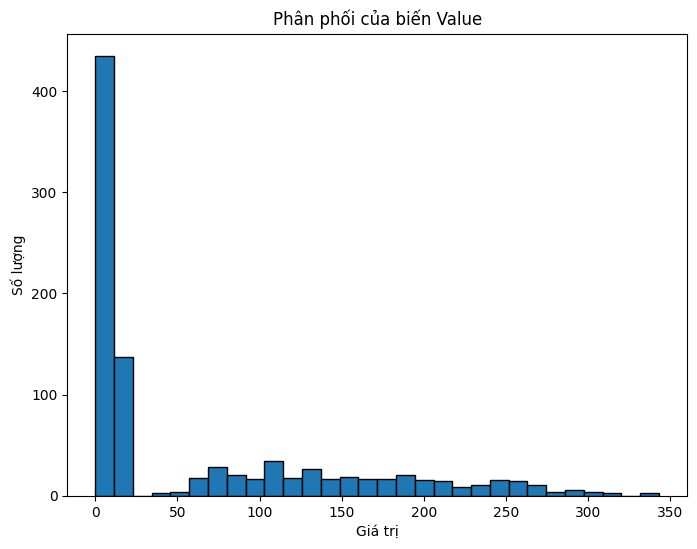

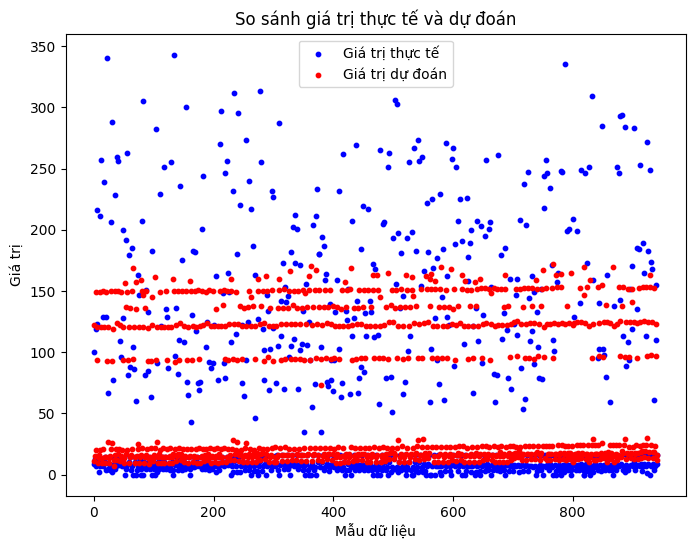

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Đọc dữ liệu từ file
data = pd.read_csv('data-01', sep='\t', header=None, names=['Date', 'Time', 'Code', 'Value'])

# Chuyển đổi Date sang số ngày
data['Date'] = data['Date'].apply(lambda x: (datetime.strptime(x, '%m-%d-%Y') - datetime(1900, 1, 1)).days)

# Chuyển đổi Time sang số giờ
data['Time'] = data['Time'].apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1]) / 60)

# Tách biến đầu ra và biến đầu vào
X = data[['Date', 'Time', 'Code']]
y = data['Value']

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X, y)

# Đánh giá mô hình
# ... (bạn có thể thêm mã đánh giá mô hình ở đây)

# Dự đoán giá trị mới
new_data = [[100, 10.5, 48]]
prediction = model.predict(new_data)
print(f"Dự đoán giá trị cho ngày thứ 100, lúc 10:30 và Code 48: {prediction[0]}")

import matplotlib.pyplot as plt

# Vẽ đồ thị phân phối của biến Value
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30, edgecolor='black')
plt.title('Phân phối của biến Value')
plt.xlabel('Giá trị')
plt.ylabel('Số lượng')
plt.show()

# Vẽ đồ thị so sánh giá trị thực tế và dự đoán
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y)), y, color='blue', label='Giá trị thực tế', s=10)
plt.scatter(range(len(y)), model.predict(X), color='red', label='Giá trị dự đoán', s=10)
plt.title('So sánh giá trị thực tế và dự đoán')
plt.xlabel('Mẫu dữ liệu')
plt.ylabel('Giá trị')
plt.legend()
plt.show()